# Pretty plotting: matplotlib

*Davide Gerosa (Milano-Bicocca)*

**Sources**: Michael Zingale at Stony Brook University: https://sbu-python-class.github.io

Matplotlib is the core plotting package in scientific python.  There are others to explore as well, see below.

<div class="alert alert-block alert-warning">

There are different interfaces for interacting with matplotlib, an interactive, function-driven (state machine) command-set and an object-oriented version.  We'll focus on the OO interface.
    
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This makes your plot look like latex. Great for writing papers!
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


## Matplotlib concepts

Matplotlib was designed with the following goals (from mpl docs):

* Plots should look great -- publication quality (e.g. antialiased)
* Postscript output for inclusion with TeX documents
* Embeddable in a graphical user interface for application development
* Code should be easy to understand it and extend
* Making plots should be easy

Matplotlib is mostly for 2-d data, but there are some basic 3-d (surface) interfaces. Volumetric data requires a different approach

### Gallery

Matplotlib has a great gallery on their webpage -- find something there close to what you are trying to do and use it as a starting point:

https://matplotlib.org/stable/gallery/index.html


or I guess these days you can ask ChatGPT "Make a matplotlib plot with four subpanels, on a 2x2 grid, shared axes, a color map on the top panel and a legend on the bottom panel"


## Tufte, the man

If you want you plot to look *really* great, have a look into the work of [Eward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), who is a pioneer of data visualization.  His "principles for good plots" are written down in his book

![](https://m.media-amazon.com/images/I/81ud7Ri9kFL._AC_UF1000,1000_QL80_.jpg)


Another great book by Tufte is [Beautiful Evidence](https://yuriweb.com/tufte/) (that's the perfect coffee table book if you want to impress your dinner guests)


Here is a summary from [Vallisneri's class at Caltech](https://web.archive.org/web/20181005144142/http://www.vallis.org/salon/summary-5.html). [This](https://medium.com/@nsaeedster/tuftes-six-principles-of-graphical-integrity-e0b6d4f445d4) is another good blog post on Tufte's principles.

Graphical excellence is the well-designed presentation of interesting data. To achieve excellence, 
- the data must be substantive; 
- its statistical treatment must be accurate; 
- and its graphical presentation must be designed for clarity, precision, and efficiency.

Tufte's principles of design  include:

- Making intelligent and appropriate comparisons
- Using data to explain causality, mechanisms, structure
- Remembering that data is often intrinsically multivariate, and finding creative ways to "escape Flatland"
- Integrating different modes of evidence by bringing words, tables, and figures together.
- Documenting the provenance of data used for plots

Tufte makes specific suggestions for achieving these principles:

To make comparisons (1):

- Maximize data ink (the amount of ink used for data as opposed to graphical structure) and data density
- Put related data side by side: use small multiples (many-panel figures)

To use data to explain (2):

- Avoid chartjunk (think Powerpoint chart "effects") and visual clutter (e.g., noisy gridlines, messy icons, clashing colors)
- Use bright colors sparingly for important things, prefer natural palettes

To integrate evidence (4):

- Treat illustrations as maps, including a scale reference, and annotating important points with their values
- In flowcharts, words are nouns, lines are verbs

Above all, Tufte stresses **graphical integrity**:

- Represent numbers proportionally in graphics (i.e., avoid distorting relative sizes with perspective effects, represent quantities by length or area as appropriate)
- Label plots clearly, avoid ambiguities.
- Show data variation, not design variation (i.e., most "information" in a plot should relate to the data, not to decoration or inessential graphical structure).


How Tuftian are the plots your paper?


### Importing

There are several different interfaces for matplotlib (see https://matplotlib.org/3.1.1/faq/index.html)

Basic ideas:

* `matplotlib` is the entire package
* `matplotlib.pyplot` is a module within matplotlib that provides easy access to the core plotting routines
* `pylab` combines pyplot and numpy into a single namespace to give a MatLab like interface.  You should avoid this&mdash;it might be removed in the future (but it still does it all the time because it's shorter to type...)

There are a number of modules that extend its behavior, e.g. `basemap` for plotting on a sphere, `mplot3d` for 3-d surfaces


### Anatomy of a figure

Figures are the highest level object and can include multiple axes
![](https://matplotlib.org/2.0.2/_images/anatomy1.png)

(figure from: http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure )


### Backends

Interactive backends: pygtk, wxpython, tkinter, ...

Hardcopy backends: PNG, PDF, PS, SVG, ...



# Basic plotting

`plot()` is the most basic command.  Here we also see that we can use LaTeX notation for the axes

(0.0, 6.283185307179586)

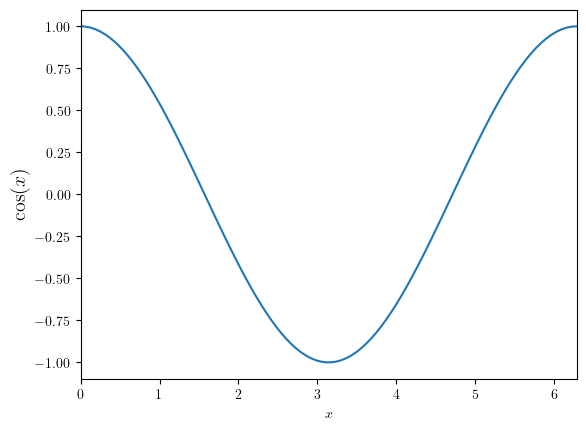

In [2]:
x = np.linspace(0,2.0*np.pi, num=100)
y = np.cos(x)

plt.plot(x,y)
plt.xlabel(r"$x$")
plt.ylabel(r"$\cos(x)$", fontsize="x-large")
plt.xlim(0, 2.0*np.pi)

Note that when we use the `plot()` command like this, matplotlib automatically creates a figure and an axis for us and it draws the plot on this for us.  This is the _state machine_ interface.  

## OO Interface

(0.0, 6.283185307179586)

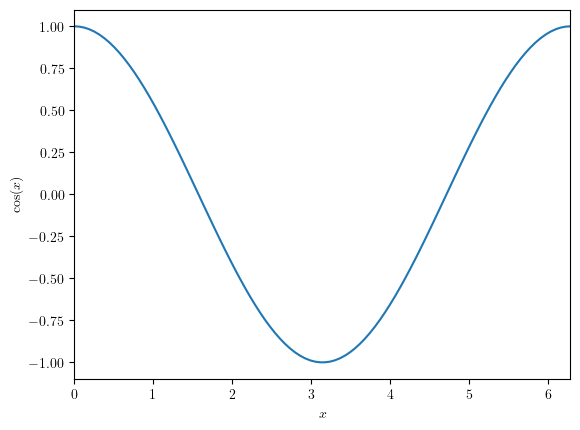

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\cos(x)$")
ax.set_xlim(0, 2*np.pi)

<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:

We can plot 2 lines on a plot simply by calling plot twice.  Make a plot with both `sin(x)` and `cos(x)` drawn

</div>

We can use symbols instead of lines pretty easily too&mdash;and label them

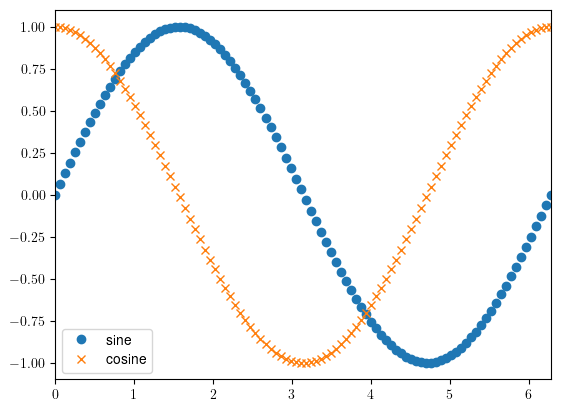

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), "o", label="sine")
ax.plot(x, np.cos(x), "x", label="cosine")
ax.set_xlim(0.0, 2.0*np.pi)
ax.legend()

Here we specified the format using a "format string" (see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)

This has the form `'[marker][line][color]'`

most functions take a number of optional named arguments too

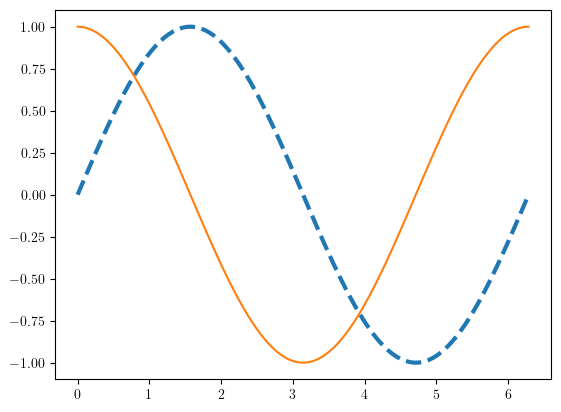

In [8]:
ax.clear()
ax.plot(x, np.sin(x), linestyle="dashed", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
fig

There is a command `setp()` that can also set the properties.

There are predefined styles that can be used too.  Generally you need to start from the figure creation for these to take effect

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


(0.0, 6.283185307179586)

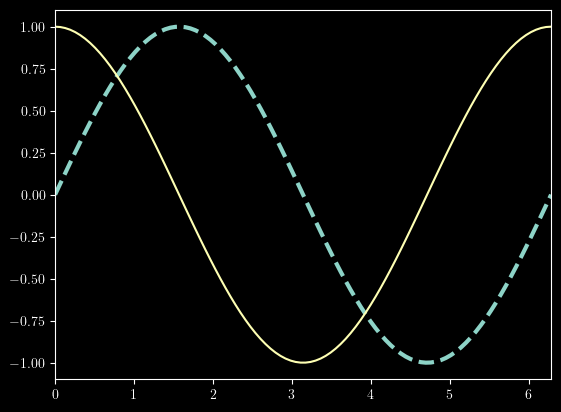

In [10]:
plt.style.use("dark_background")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), linestyle="--", linewidth=3.0)
ax.plot(x, np.cos(x), linestyle="-")
ax.set_xlim(0.0, 2.0*np.pi)

In [11]:
plt.style.use("default")

# Multiple axes

There are a wide range of methods for putting multiple axes on a grid.  We'll look at the simplest method.

The `add_subplot()` method we've been using can take 3 numbers: the number of rows, number of columns, and current index

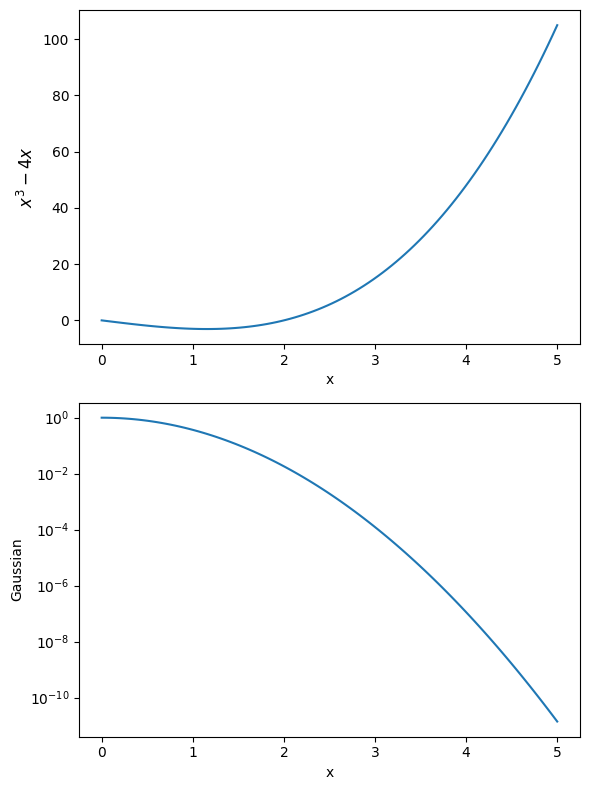

In [12]:
fig = plt.figure()

ax1 = fig.add_subplot(211)

x = np.linspace(0,5,100)
ax1.plot(x, x**3 - 4*x)
ax1.set_xlabel("x")
ax1.set_ylabel(r"$x^3 - 4x$", fontsize="large")

ax2 = fig.add_subplot(212)

ax2.plot(x, np.exp(-x**2))
ax2.set_xlabel("x")
ax2.set_ylabel("Gaussian")

# log scale
ax2.set_yscale("log")

# set the figure size
fig.set_size_inches(6, 8)

# tight_layout() makes sure things don't overlap
fig.tight_layout()

# Visualizing 2-d array data

2-d datasets consist of (x, y) pairs and a value associated with that point.  Here we create a 2-d Gaussian, using the `meshgrid()` function to define a rectangular set of points.

In [13]:
def g(x, y):
    return np.exp(-((x-0.5)**2)/0.1**2 - ((y-0.5)**2)/0.2**2)

N = 100

x = np.linspace(0.0,1.0,N)
y = x.copy()

xv, yv = np.meshgrid(x, y)

A "heatmap" style plot assigns colors to the data values.  A lot of work has gone into the latest matplotlib to define a colormap that works good for colorblindness and black-white printing.

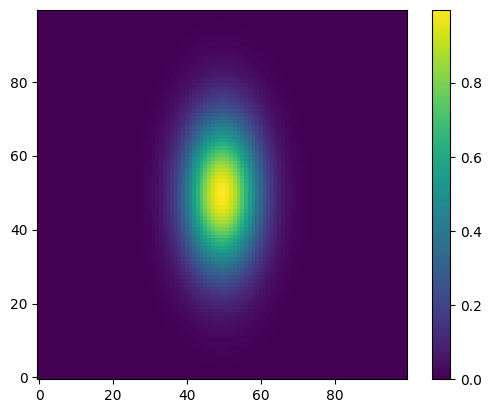

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(g(xv, yv), origin="lower")
fig.colorbar(im, ax=ax)

Sometimes we want to show just contour lines&mdash;like on a topographic map.  The `contour()` function does this for us.

(0.0, 99.0, 0.0, 99.0)

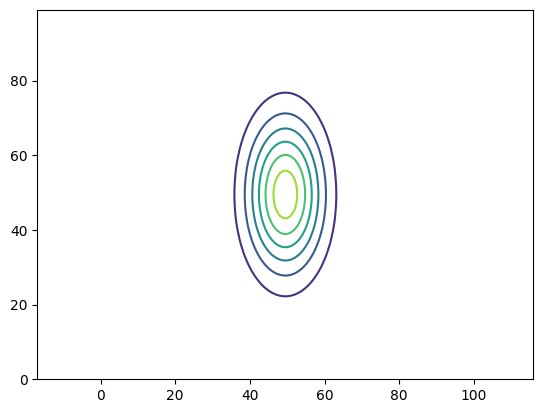

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
contours = ax.contour(g(xv, yv))
ax.axis("equal")   # this adjusts the size of image to make x and y lengths equal

<div class="alert alert-block alert-warning">
    
<span class="fa fa-flash"></span> Quick Exercise:
    
Contour plots can label the contours, using the `ax.clabel()` function.
Try adding labels to this contour plot.
</div>

# Error bars

For experiments, we often have errors associated with the $y$ values.  Here we create some data and add some noise to it, then plot it with errors.

In [16]:
def y_experiment(a1, a2, sigma, x):
    """ return the experimental data in a linear + random fashion a1
        is the intercept, a2 is the slope, and sigma is the error """

    N = len(x)

    # randn gives samples from the "standard normal" distribution
    r = np.random.randn(N)
    y = a1 + a2*x + sigma*r
    return y

N = 40
x = np.linspace(0.0, 100.0, N)
sigma = 25.0*np.ones(N)
y = y_experiment(10.0, 3.0, sigma, x)

<ErrorbarContainer object of 3 artists>

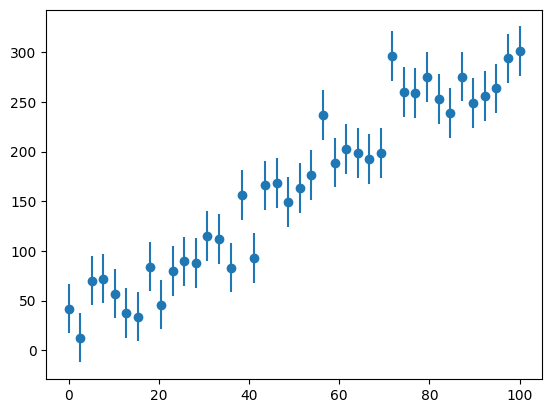

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x, y, yerr=sigma, fmt="o")

# Annotations

Adding text and annotations is easy

In [18]:
xx = np.linspace(0, 2.0*np.pi, 1000)

Text(1.5707963267948966, 1.0, 'maximum')

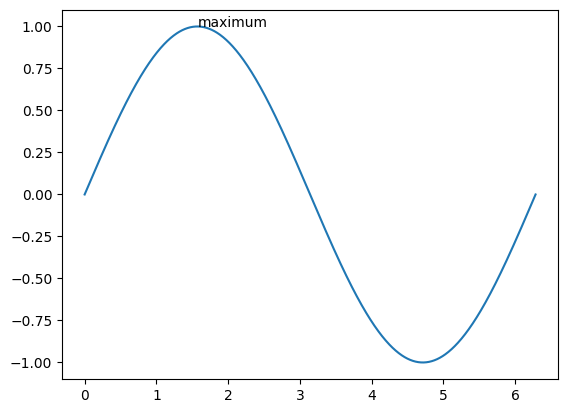

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xx, np.sin(xx))
ax.text(np.pi/2, np.sin(np.pi/2), r"maximum")

We can also turn off the top and right "spines"

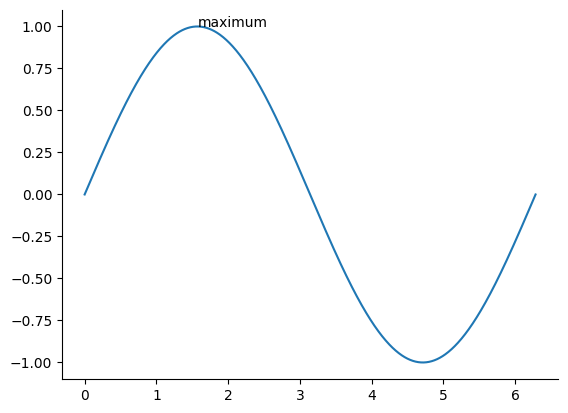

In [21]:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left') 
fig

Annotations with an arrow are also possible

Text(0.05, 0.05, 'a polar annotation')

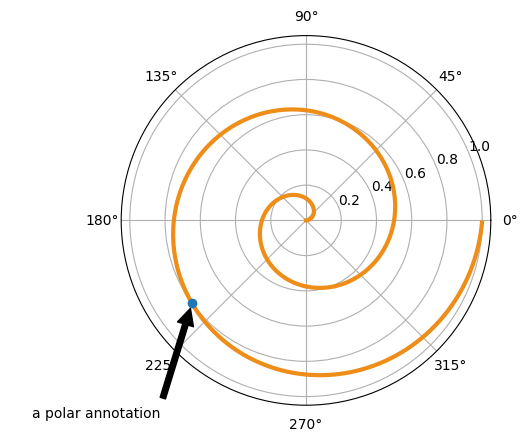

In [22]:
#example from http://matplotlib.org/examples/pylab_examples/annotation_demo.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )


# Surface plots

Matplotlib can't deal with true 3-d data (i.e., x,y,z + a value), but it can plot 2-d surfaces and lines in 3-d.

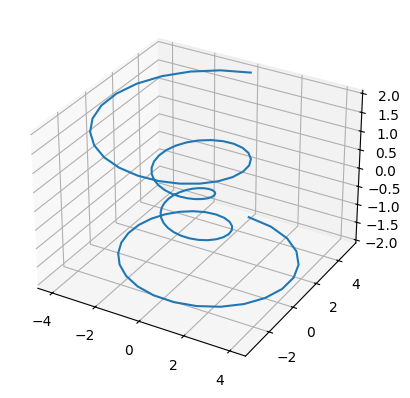

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection="3d")

# parametric curves
N = 100
theta = np.linspace(-4*np.pi, 4*np.pi, N)
z = np.linspace(-2, 2, N)
r = z**2 + 1

x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z)

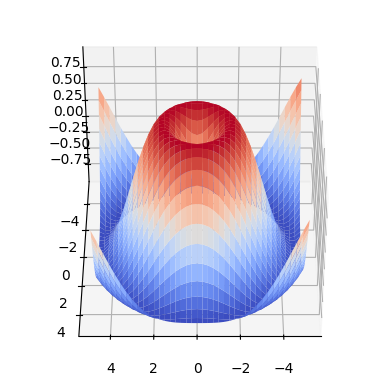

In [26]:
fig = plt.figure()
ax = plt.axes(projection="3d")

X = np.arange(-5,5, 0.25)
Y = np.arange(-5,5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="coolwarm")

# and the view (note: most interactive backends will allow you to rotate this freely)
ax.azim = 90
ax.elev = 40

# Histograms

Here we generate a bunch of gaussian-normalized random numbers and make a histogram.  The probability distribution should match
$$y(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-x^2/(2\sigma^2)}$$

Note `density=True` to get the right normalization

Text(0.5, 0, 'x')

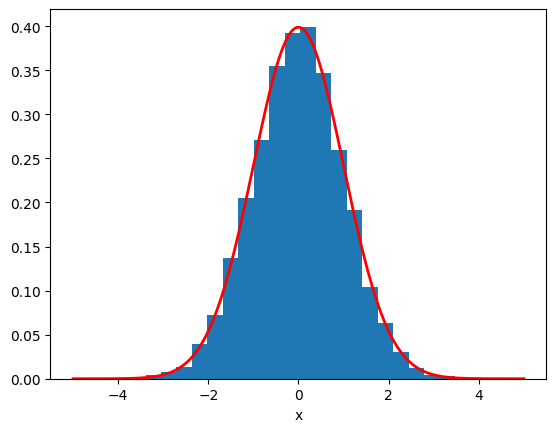

In [28]:
N = 10000
r = np.random.randn(N)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(r, density=True, bins=20)

x = np.linspace(-5,5,200)
sigma = 1.0
ax.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
         c="r", lw=2)
ax.set_xlabel("x")

# Plotting data from a file

`numpy.loadtxt()` provides an easy way to read columns of data from an ASCII file

In [30]:
data = np.loadtxt("test1.exact.128.out")
print(data.shape)

FileNotFoundError: test1.exact.128.out not found.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data[:,1], data[:,2]/np.max(data[:,2]), label=r"$\rho$")
ax.plot(data[:,1], data[:,3]/np.max(data[:,3]), label=r"$u$")
ax.plot(data[:,1], data[:,4]/np.max(data[:,4]), label=r"$p$")
ax.plot(data[:,1], data[:,5]/np.max(data[:,5]), label=r"$T$")
ax.set_ylim(0,1.1)
ax.legend(frameon=False, fontsize=12)

## More plotting


There are a lot of new projects, some built upon matplotlib, others independent.
A common goal for a lot of these is to allow for interactive data exploration in the web browser. Many use the javascript library `d3.js` to do this.

- **mpld3**: http://mpld3.github.io/ (3D functionalities)
- **Bokeh**: http://bokeh.pydata.org/en/latest/ (browser friendly)
- **plot.ly**: https://plot.ly/ (browser friendly, even too much actually)
- **Glue**: http://www.glueviz.org/en/stable/ (explore relationships amongrelated datasets)
- **D3PO**: http://d3po.org/
- **d3py**: https://github.com/mikedewar/d3py(inactive?)
- **Seaborn**: http://web.stanford.edu/~mwaskom/software/seaborn/(basedon matplotlib)
- **ggplot**: https://github.com/yhat/ggplot/ (for you R users)

## Easter egg

If you're a geek like me and love xkcd, rerun these examples after doing `plt.xkcd()`

In [31]:
#plt.xkcd()

# Exercises

For the exam, please prepare 2 exercises from this list.

In [32]:
import matplotlib.pyplot as plt
import numpy as np

## Q1: Tuftian plot

- Pick the worst plot you ever published in paper (you know what I'm talking about, the one that looks real crap!)
- Go through Tufte's principles and annotate all you've done wrong.
- Redo the plot, but this time go for "graphical excellence". 
- Compare the result with what you had before.

## Q2: Planetary positions

The distances of the planets from the Sun (technically, their semi-major axes) are:

In [33]:
a = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

These are in units where the Earth-Sun distance is 1 (astronomical units).

The corresponding periods of their orbits (how long they take to go once around the Sun) are, in years

In [34]:
P = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Finally, the names of the planets corresponding to these are:

In [35]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

(technically, pluto isn't a planet anymore, but we still love it :)

  * Plot as points, the periods vs. distances for each planet on a log-log plot.

  * Write the name of the planet next to the point for that planet on the plot

## Q3: A perfect circle

For an angle $\theta$ in the range $\theta \in [0, 2\pi]$, the polar equations of a circle of radius $R$ are:

$$x = R\cos(\theta)$$

$$y = R\sin(\theta)$$

We want to draw a circle.   

  * Create an array to hold the theta values&mdash;the more we use, the smoother the circle will be
  * Create `x` and `y` arrays from `theta` for your choice of $R$
  * Plot `y` vs. `x`
  
Now, look up the matplotlib `fill()` function, and draw a circle filled in with a solid color.

Generalize your circle drawing commands to produce a function, 
```
draw_circle(x0, y0, R, color)
```
that draws the circle.  Here, `(x0, y0)` is the center of the circle, `R` is the radius, and `color` is the color of the circle.  

Now randomly draw 10 circles at different locations, with random radii, and random colors on the same plot.

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

## Q5: Subplots

matplotlib has a number of ways to create multiple axes in a figure -- look at `plt.subplots()` (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)

Create an `x` array using NumPy with a number of points, spanning from $[0, 2\pi]$.  

Create 3 axes vertically, and do the following:

* Define a new numpy array `f` initialized to a function of your choice.
* Plot f in the top axes
* Compute a numerical derivative of `f`,
   $$ f' = \frac{f_{i+1} - f_i}{\Delta x}$$
  and plot this in the middle axes
* Do this again, this time on $f'$ to compute the second derivative and plot that in the bottom axes


## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [36]:
f = open("shore_leave.txt", "r")

for line in f:
    pass

#### Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


In [37]:
N = 256
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

In [38]:
c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)

for i in range(10):
    z = z**2 + c
    
m = np.ones((N, N))
m[np.abs(z) <= 2] = 0.0

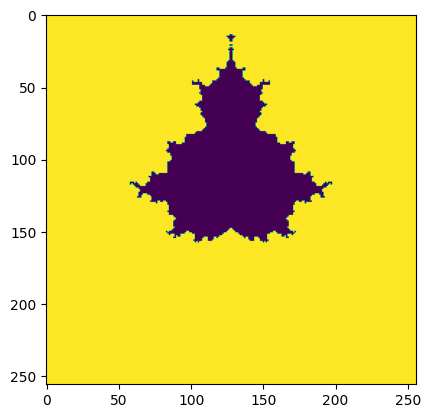

In [39]:
fig, ax = plt.subplots()
ax.imshow(m)

## Q8: Game of Life visualization

If you've implemented Conway's Game of Life from last lecture, make a visualization of your result using matplotlib

## Q9: Quit smoking

If you ever used ROOT for your scientific plotting, stop now. It's not good for your health.
